In [16]:
import matplotlib.pyplot as plt

In [17]:
car_img= plt.imread("car.jpg")
logo_img= plt.imread("Honda logo.jpg")


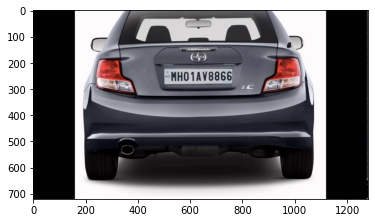

In [18]:
plt.imshow(car_img)

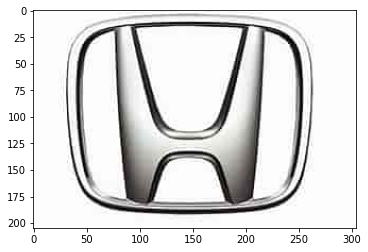

In [19]:
plt.imshow(logo_img)


In [20]:
logo_height, logo_width= logo_img.shape[:2]

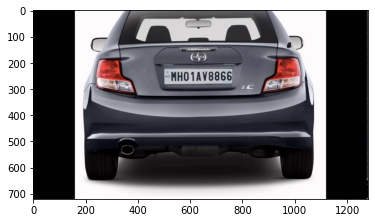

In [21]:
result_image = car_img.copy()
plt.imshow(result_image)


In [22]:
import cv2
import numpy as np

In [23]:
car_img= cv2.imread('car.jpg')
logo_img= cv2.imread('Honda logo.jpg')
result_image= car_img.copy()

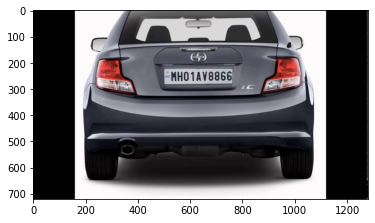

In [24]:
x, y, width, height= (500, 200, 300, 100) # dekho ye coordinates mene upar wali image se apporximate krke liye hai , you'll need to give as parameter
resized_logo = cv2.resize(logo_img, (width, height))

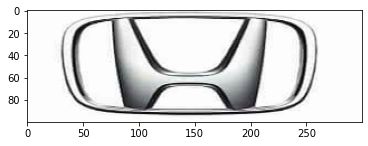

In [25]:
plt.imshow(resized_logo)

In [26]:
result_image[y:y+height, x:x+width] = resized_logo

In [28]:
result_image= cv2.cvtColor(result_image, cv2.COLOR_BGR2RGB)

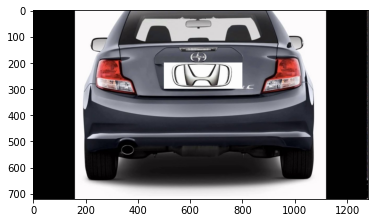

In [29]:
plt.imshow(result_image)

In [7]:
matrix= [
    [1, 1, 1, 1], 
    [2, 2, 2, 2], 
    [3, 3, 3, 3], 
    [4, 4, 4, 4],
]

matrix

[[1, 1, 1, 1], [2, 2, 2, 2], [3, 3, 3, 3], [4, 4, 4, 4]]

In [5]:
matrix.pop()

array([1, 2, 3, 4])

In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

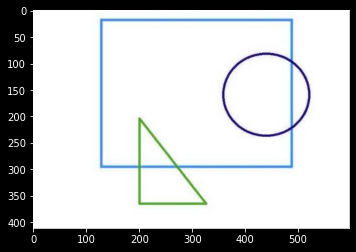

In [2]:
image= cv2.imread('Input.jpg')
plt.imshow(image)

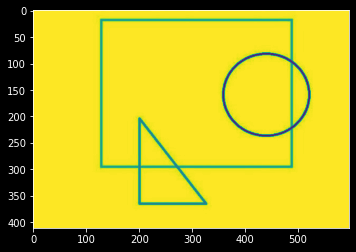

In [3]:
gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
plt.imshow(gray_image)

In [6]:
contours, _ = cv2.findContours(gray_image, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)



print(contours)


(array([[[  0,   0]],

       [[  0, 410]],

       [[596, 410]],

       [[596,   0]]], dtype=int32),)


In [7]:
# Filter the contours based on their shapes (rectangle and circle)
rectangle_contour = None
circle_contour = None

for contour in contours:
    area = cv2.contourArea(contour)
    perimeter = cv2.arcLength(contour, True)
    approx = cv2.approxPolyDP(contour, 0.04 * perimeter, True)

    if len(approx) == 4:
        rectangle_contour = contour
    elif len(approx) > 6:
        circle_contour = contour

In [8]:
rectangle_contour

array([[[  0,   0]],

       [[  0, 410]],

       [[596, 410]],

       [[596,   0]]], dtype=int32)

In [10]:
circle_contour

In [13]:

img = cv2.imread('Input.jpg')
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

ret,thresh = cv2.threshold(gray,127,255,1)

contours,h = cv2.findContours(thresh,1,2)

for cnt in contours:
    approx = cv2.approxPolyDP(cnt,0.01*cv2.arcLength(cnt,True),True)
    print (len(approx))
    if len(approx)==5:
        print ("pentagon")
        cv2.drawContours(img,[cnt],0,255,-1)
    elif len(approx)==3:
        print ("triangle")
        cv2.drawContours(img,[cnt],0,(0,255,0),-1)
    elif len(approx)==4:
        print ("square")
        cv2.drawContours(img,[cnt],0,(0,0,255),-1)
    elif len(approx) == 9:
        print ("half-circle")
        cv2.drawContours(img,[cnt],0,(255,255,0),-1)
    elif len(approx) > 15:
        print( "circle")
        cv2.drawContours(img,[cnt],0,(0,255,255),-1)

cv2.imshow('img',img)
cv2.waitKey(0)
cv2.destroyAllWindows()

4
square
4
square
4
square
4
square
6
6
6
4
square
6
4
square
6
4
square
4
square
6
6
4
square
6
4
square
4
square
4
square
4
square
4
square
4
square
9
half-circle
6
4
square
4
square
6
15
14


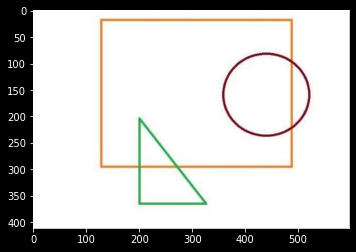

In [26]:
(new_img)= plt.imread('Input.jpg')
plt.imshow(new_img)

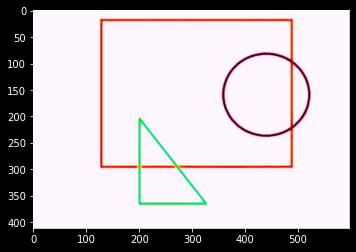

In [27]:
(new_img)= plt.imread('Input-1.jpg')
plt.imshow(new_img)

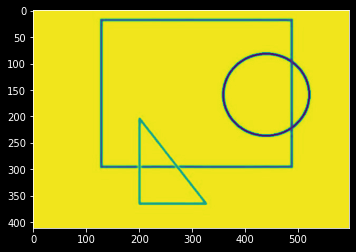

In [31]:
new_img= cv2.cvtColor(new_img, cv2.COLOR_RGB2BGR)
gray_image= cv2.cvtColor(new_img, cv2.COLOR_BGR2GRAY)
plt.imshow(gray_image)

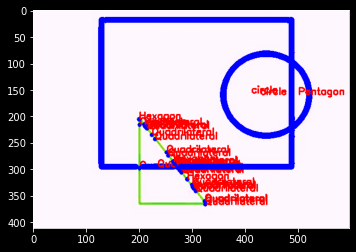

In [32]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

# reading image
img = cv2.imread('Input-1.jpg')

# converting image into grayscale image
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

# setting threshold of gray image
_, threshold = cv2.threshold(gray, 127, 255, cv2.THRESH_BINARY)

# using a findContours() function
contours, _ = cv2.findContours(
	threshold, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)

i = 0
shape= img.shape
img_copy= np.zeros(shape=shape)


# list for storing names of shapes
for contour in contours:

	# here we are ignoring first counter because
	# findcontour function detects whole image as shape
	if i == 0:
		i = 1
		continue

	# cv2.approxPloyDP() function to approximate the shape
	approx = cv2.approxPolyDP(
		contour, 0.01 * cv2.arcLength(contour, True), True)
	
	
	
	# using drawContours() function
	cv2.drawContours(img, [contour], 0, (0, 0, 255), 5)
	cv2.drawContours(img_copy, [contour], 0, (0, 0, 255), 5)


	# finding center point of shape
	M = cv2.moments(contour)
	if M['m00'] != 0.0:
		x = int(M['m10']/M['m00'])
		y = int(M['m01']/M['m00'])

	# putting shape name at center of each shape
	if len(approx) == 3:
		cv2.putText(img, 'Triangle', (x, y),
					cv2.FONT_HERSHEY_SIMPLEX, 0.6, (255, 0, 0), 2)

	elif len(approx) == 4:
		cv2.putText(img, 'Quadrilateral', (x, y),
					cv2.FONT_HERSHEY_SIMPLEX, 0.6, (255, 0, 0), 2)

	elif len(approx) == 5:
		cv2.putText(img, 'Pentagon', (x, y),
					cv2.FONT_HERSHEY_SIMPLEX, 0.6, (255, 0, 0), 2)

	elif len(approx) == 6:
		cv2.putText(img, 'Hexagon', (x, y),
					cv2.FONT_HERSHEY_SIMPLEX, 0.6, (255, 0, 0), 2)

	else:
		cv2.putText(img, 'circle', (x, y),
					cv2.FONT_HERSHEY_SIMPLEX, 0.6, (255, 0, 0), 2)

# displaying the image after drawing contours
# cv2.imshow('shapes', img)

# cv2.waitKey(0)
# cv2.destroyAllWindows()
plt.imshow(img)


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


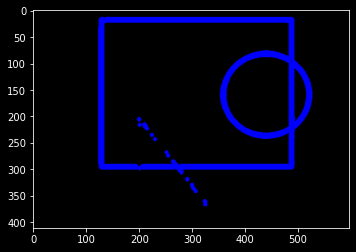

In [33]:
plt.imshow(img_copy)

In [38]:
import cv2
import numpy as np

# Load the image
image = cv2.imread("Input-1.jpg")  # Replace with the actual path to your image

# Convert the image to grayscale
gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

# Apply contour detection
contours, _ = cv2.findContours(gray_image, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

# Filter the contours based on their shapes (rectangle and circle)
rectangle_contour = None
circle_contour = None

for contour in contours:
    area = cv2.contourArea(contour)
    perimeter = cv2.arcLength(contour, True)
    approx = cv2.approxPolyDP(contour, 0.04 * perimeter, True)

    if len(approx) == 4:
        rectangle_contour = contour
    elif len(approx) > 6:
        circle_contour = contour

# Find the bounding rectangles for the rectangle and circle contours
rect_x, rect_y, rect_width, rect_height = cv2.boundingRect(rectangle_contour)
circle_x, circle_y, circle_radius = cv2.minEnclosingCircle(circle_contour)
circle_radius = int(circle_radius)

# Calculate the area of intersection between the two bounding rectangles
x1 = max(rect_x, int(circle_x - circle_radius))
y1 = max(rect_y, int(circle_y - circle_radius))
x2 = min(rect_x + rect_width, int(circle_x + circle_radius))
y2 = min(rect_y + rect_height, int(circle_y + circle_radius))

width = max(0, x2 - x1)
height = max(0, y2 - y1)

intersection_area = width * height

# Fill the intersection area with an orange color
if intersection_area > 0:
    intersection_mask = np.zeros_like(gray_image)
    cv2.drawContours(intersection_mask, [rectangle_contour, circle_contour], -1, 255, thickness=cv2.FILLED)
    orange_color = (0, 165, 255)
    image_with_intersection = cv2.addWeighted(image, 1, cv2.cvtColor(intersection_mask, cv2.COLOR_GRAY2BGR), 0.5, 0)
else:
    print("No intersection between the rectangle and the circle.")
    image_with_intersection = image.copy()

# Display the image with the filled intersection area
cv2.imshow("Image with Filled Intersection Area", image_with_intersection)
cv2.waitKey(0)
cv2.destroyAllWindows()


error: OpenCV(4.7.0) D:\a\opencv-python\opencv-python\opencv\modules\imgproc\src\shapedescr.cpp:201: error: (-215:Assertion failed) count >= 0 && (depth == CV_32F || depth == CV_32S) in function 'cv::minEnclosingCircle'
